In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Covid.csv")

In [4]:
df.head(10)

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1
5,male,50,1,1,0,0,0,0,0,0,0,1
6,female,55,1,1,0,0,0,0,0,0,0,0
7,female,55,0,0,0,0,0,0,0,1,0,0
8,female,55,1,1,0,0,0,0,0,0,0,1
9,female,48,1,1,0,0,0,0,0,1,0,0


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [6]:
df.isna().sum()

gender                 0
age_year               0
fever                  0
cough                  0
runny_nose             0
muscle_soreness        0
pneumonia              0
diarrhea               0
lung_infection         0
travel_history         0
isolation_treatment    0
SARS-CoV-2 Positive    0
dtype: int64

In [7]:
df.dropna()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,female,44,1,1,0,0,0,0,0,1,0,1
6508,female,44,1,1,0,0,0,0,0,0,0,0
6509,female,58,0,0,0,0,0,0,0,0,0,0
6510,female,58,1,1,0,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               6512 non-null   object
 1   age_year             6512 non-null   int64 
 2   fever                6512 non-null   int64 
 3   cough                6512 non-null   int64 
 4   runny_nose           6512 non-null   int64 
 5   muscle_soreness      6512 non-null   int64 
 6   pneumonia            6512 non-null   int64 
 7   diarrhea             6512 non-null   int64 
 8   lung_infection       6512 non-null   int64 
 9   travel_history       6512 non-null   int64 
 10  isolation_treatment  6512 non-null   int64 
 11  SARS-CoV-2 Positive  6512 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 610.6+ KB


In [13]:
df.gender[df.gender == "male"]=1
df.gender[df.gender == "female"]=0

C:\Users\moshi\AppData\Local\Temp/ipykernel_13292/1946522788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == "male"]=1
C:\Users\moshi\AppData\Local\Temp/ipykernel_13292/1946522788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df.gender == "female"]=0


In [14]:
df['gender'] = df['gender'].astype('int64')

In [15]:
df.info

<bound method DataFrame.info of       gender  age_year  fever  cough  runny_nose  muscle_soreness  pneumonia  \
0          1        89      1      1           0                0          0   
1          1        68      1      0           0                0          0   
2          1        68      0      0           0                0          0   
3          1        68      1      1           0                0          0   
4          1        50      1      1           1                0          1   
...      ...       ...    ...    ...         ...              ...        ...   
6507       0        44      1      1           0                0          0   
6508       0        44      1      1           0                0          0   
6509       0        58      0      0           0                0          0   
6510       0        58      1      1           0                0          0   
6511       1        12      1      1           0                0          0   

      d

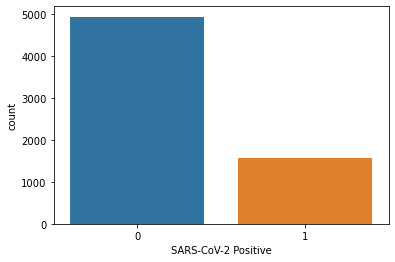

In [16]:
sns.countplot(x="SARS-CoV-2 Positive", data=df);

In [17]:
df.value_counts("gender")

gender
1    3367
0    3145
dtype: int64

In [18]:
df.value_counts("SARS-CoV-2 Positive")

SARS-CoV-2 Positive
0    4940
1    1572
dtype: int64